In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('As.csv',usecols=['Period','Total'])

In [4]:
df.head()

,Period,Total
0,2000-Jan,49045412
1,2000-Feb,49306303
2,2000-Mar,60443541
3,2000-Apr,58286680
4,2000-May,60533783


In [5]:
df

,Period,Total
0,2000-Jan,49045412
1,2000-Feb,49306303
2,2000-Mar,60443541
3,2000-Apr,58286680
4,2000-May,60533783
...,...,...
237,2019-Oct,88190827
238,2019-Nov,80993251
239,2019-Dec,90371201
240,2020-Jan,81511977


In [6]:
df=pd.read_csv('AS.csv',index_col=['Period'],parse_dates=True,squeeze=True,usecols=['Period','Total'])

In [7]:
df.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

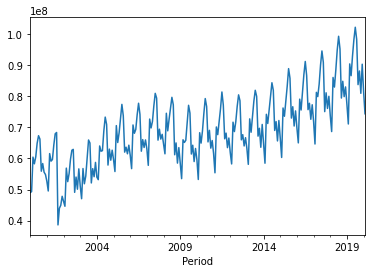

In [8]:
df.plot()

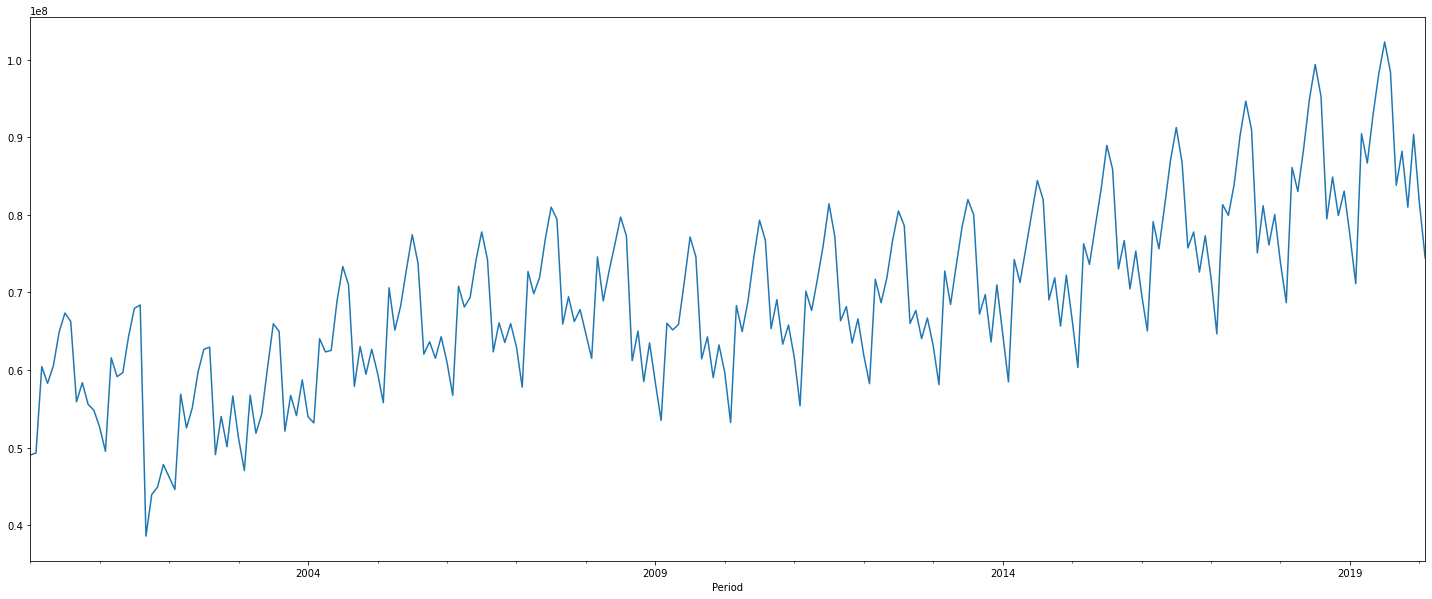

In [9]:
df.plot(figsize=(25,10),) 

In [10]:
df.tail(5)

Period
2019-10-01    88190827
2019-11-01    80993251
2019-12-01    90371201
2020-01-01    81511977
2020-02-01    74398772
Name: Total, dtype: int64

In [11]:
df.size

242

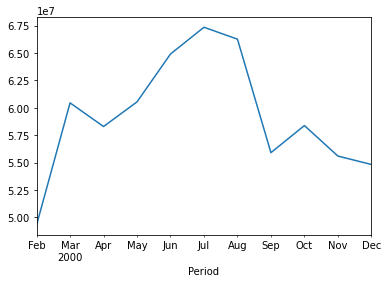

In [12]:
df[1:12].plot()

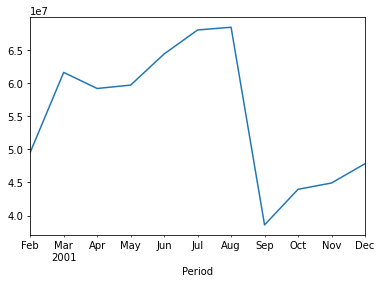

In [13]:
df[13:24].plot()


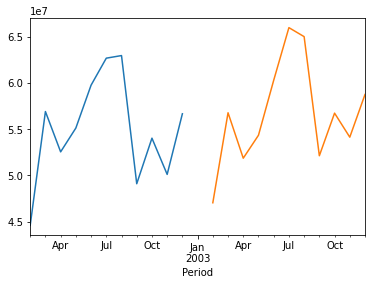

In [14]:

df[25:36].plot()
df[37:48].plot()


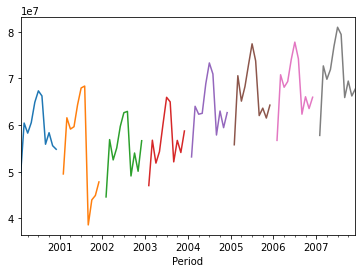

In [15]:
df[1:12].plot()
df[13:24].plot()
df[25:36].plot()
df[37:48].plot()
df[49:60].plot()
df[61:72].plot()
df[73:84].plot()
df[85:96].plot()

# So this Data Look is Seasonal|

In [16]:
df.describe()

count    2.420000e+02
mean     6.910944e+07
std      1.154640e+07
min      3.860172e+07
25%      6.153300e+07
50%      6.828799e+07
75%      7.675590e+07
max      1.022825e+08
Name: Total, dtype: float64

In [17]:
train=df[0:180] 
test=df[181:242]

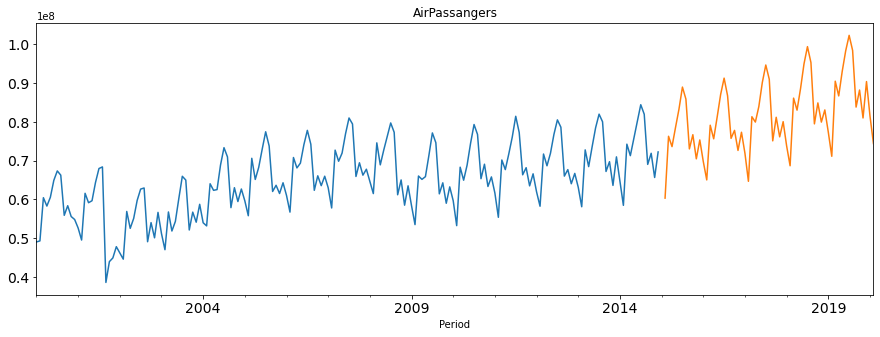

In [18]:
train.plot(figsize=(15,5), title= 'AirPassangers', fontsize=14)
test.plot(figsize=(15,5), title= 'AirPassangers', fontsize=14)
plt.show()

## fluctuated the curve

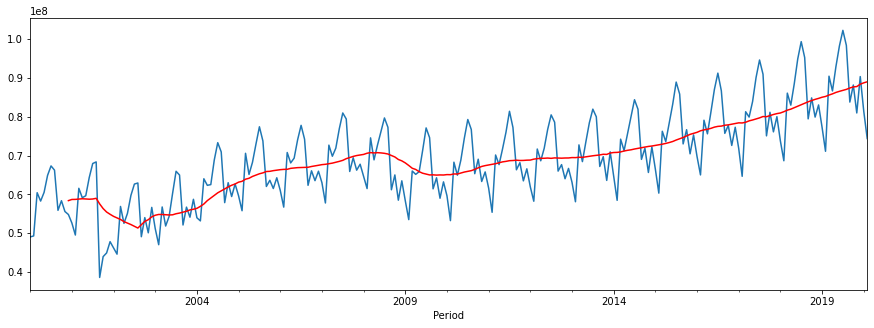

In [19]:
moving_avg =df.rolling(12).mean()
df.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

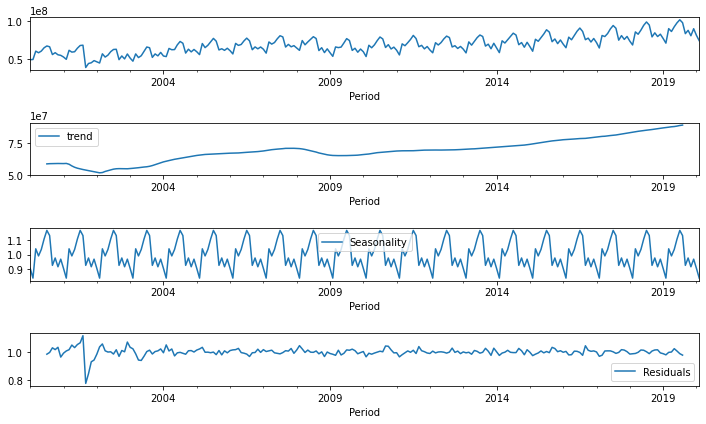

In [20]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

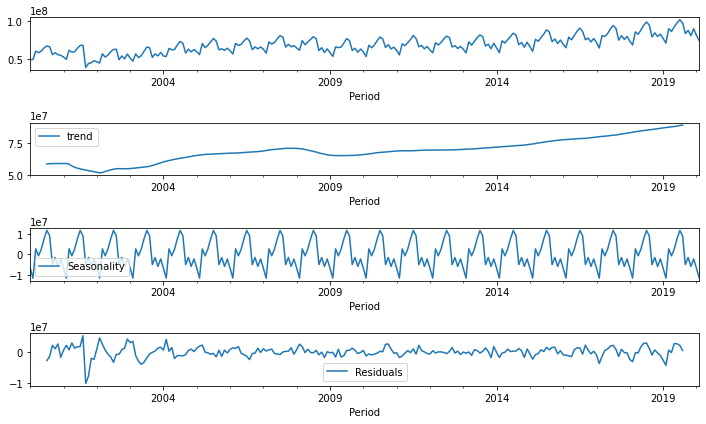

In [21]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## ### Testing For Stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
df1=pd.DataFrame(df)

In [24]:
df1


,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783
...,...
2019-10-01,88190827
2019-11-01,80993251
2019-12-01,90371201


In [25]:
test_result=adfuller(df1['Total'])

In [26]:
test_result

(0.22321601663656698,
 0.9735340588887246,
 13,
 228,
 {'1%': -3.4593607492757554,
  '5%': -2.8743015807562924,
  '10%': -2.5735714042782396},
 7266.289195330194)

In [27]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Total):
    result=adfuller(Total)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [28]:
adfuller_test(df1['Total'])

ADF Test Statistic : 0.22321601663656698
p-value : 0.9735340588887246
#Lags Used : 13
Number of Observations Used : 228
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Over Data is non-stationary

# And Now we caalculating Differencing 
# Because Our data Is Seasonal When We 
# Calculating Diff Of 12 Months

In [29]:
df1['Total_Diff_Seasonal']=df1['Total']-df1['Total'].shift(12)

In [30]:
df1.head(14)

,Total,Total_Diff_Seasonal
Period,,
2000-01-01,49045412,NaN
2000-02-01,49306303,NaN
2000-03-01,60443541,NaN
2000-04-01,58286680,NaN
2000-05-01,60533783,NaN
2000-06-01,64903295,NaN
2000-07-01,67346377,NaN
2000-08-01,66256804,NaN
2000-09-01,55900504,NaN


## Again test dickey fuller test

In [31]:

adfuller_test(df1['Total_Diff_Seasonal'].dropna())

ADF Test Statistic : -2.9233981453279827
p-value : 0.042693984629899366
#Lags Used : 13
Number of Observations Used : 216
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Now You Can See Our Data Is Statinoary

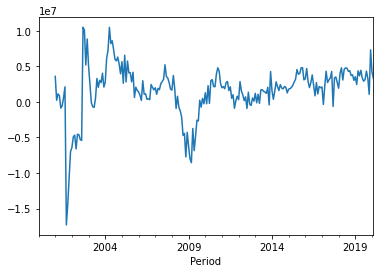

In [32]:
df1.Total_Diff_Seasonal.plot()

## Almost Data Is Statinoary

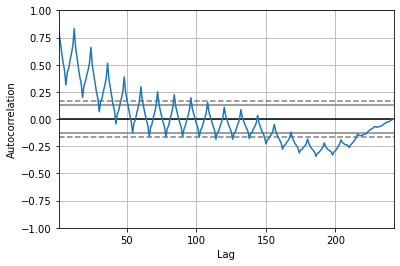

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1.Total)
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [35]:
df1.Total_Diff_Seasonal.iloc[13:]

Period
2001-02-01     226275.0
2001-03-01    1131514.0
2001-04-01     864965.0
2001-05-01    -871367.0
2001-06-01    -549972.0
                ...    
2019-10-01    3319854.0
2019-11-01    1065073.0
2019-12-01    7313254.0
2020-01-01    4179434.0
2020-02-01    3283777.0
Name: Total_Diff_Seasonal, Length: 229, dtype: float64

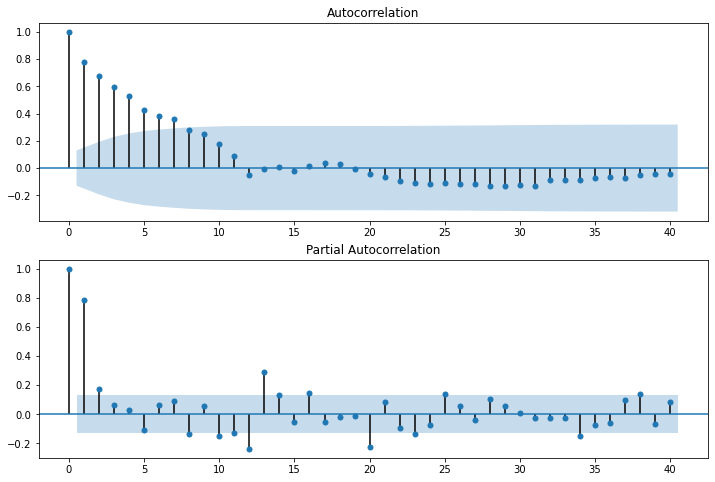

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.Total_Diff_Seasonal.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1.Total_Diff_Seasonal.iloc[13:],lags=40,ax=ax2)

## (p,d,q)(Ar Model Lags,D is Diff, and Q is moving Aveg lags)(1,0,1)

In [37]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model=ARIMA(df1['Total'],order=(1,1,1))
model_fit=model.fit()

F:\anaconda\envs\b\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\anaconda\envs\b\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\anaconda\envs\b\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Total   No. Observations:                  241
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4116.551
Method:                       css-mle   S.D. of innovations        6306551.110
Date:                Wed, 10 Jun 2020   AIC                           8241.101
Time:                        21:33:57   BIC                           8255.040
Sample:                    02-01-2000   HQIC                          8246.717
                         - 02-01-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.052e+05        nan        nan        nan         nan         nan
ar.L1.D.Total     0.5817      0.055     10.546      0.000       0.474       0.690
ma.L1.D.Total    -0.9882        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7191           +0.0000j            1.7191            0.0000
MA.1            1.0120           +0.0000j            1.0120            0.0000
-----------------------------------------------------------------------------
"""

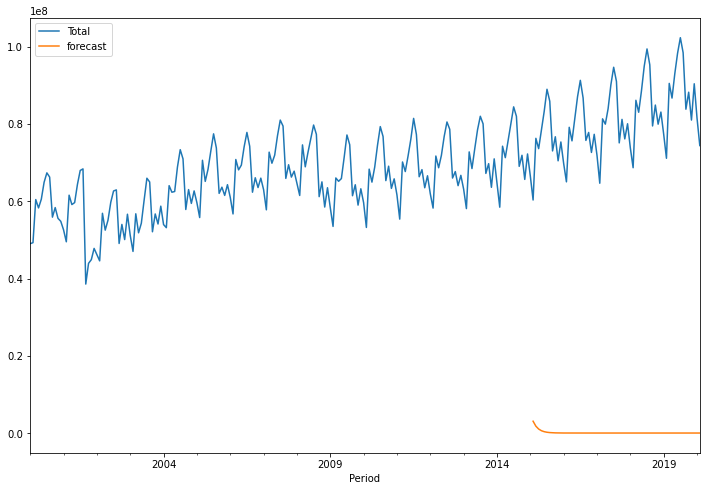

In [40]:
df1['forecast']=model_fit.predict(start=181,end=242,dynamic=True)
df1[['Total','forecast']].plot(figsize=(12,8))

In [41]:
model=sm.tsa.statespace.SARIMAX(df1['Total'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

F:\anaconda\envs\b\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\anaconda\envs\b\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


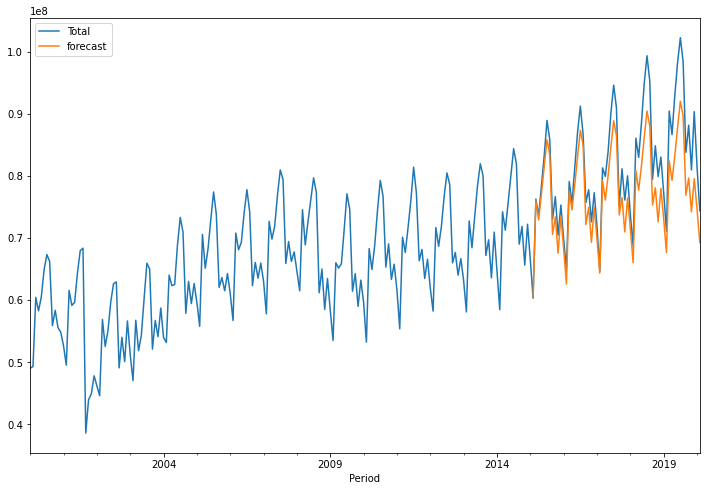

In [42]:
df1['forecast']=results.predict(start=181,end=242,dynamic=True)
df1[['Total','forecast']].plot(figsize=(12,8))

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [44]:
train=df[0:180] 
test=df[181:242]

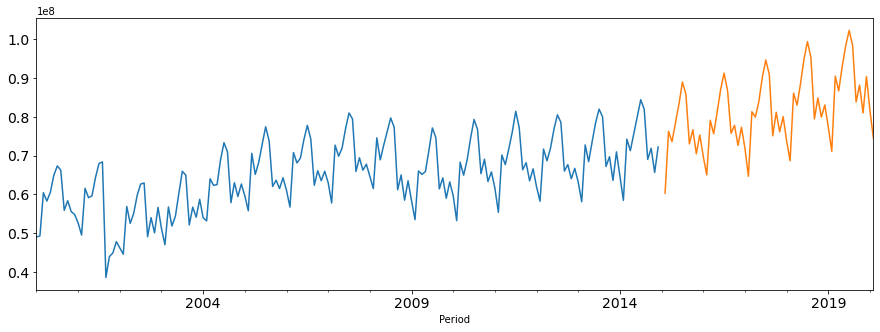

In [45]:
train.plot(figsize=(15,5),fontsize=14)
test.plot(figsize=(15,5),  fontsize=14)
plt.show()

In [46]:
model=sm.tsa.statespace.SARIMAX(df,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

F:\anaconda\envs\b\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\anaconda\envs\b\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
pred_y=model_fit.predict(start=181,end=241,dynamic=True)

In [48]:
np.sqrt(mean_squared_error(df[181:242],pred_y))

5241473.93915783

In [49]:
p_values=range(0,3)
d_value=range(0,3)
q_values=range(0,3)

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
df

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
                ...   
2019-10-01    88190827
2019-11-01    80993251
2019-12-01    90371201
2020-01-01    81511977
2020-02-01    74398772
Name: Total, Length: 242, dtype: int64

In [51]:
for p in p_values:
    for d in d_value:
        for q in q_values:
            order=(p,d,q)
            se_od=(p,d,q,12)
            predications=list()
            for i in range(1):
                try:

                    model=sm.tsa.statespace.SARIMAX(df,order=order,seasonal_order=se_od)
                    model_fit=model.fit()
                    pred_y=model_fit.predict(start=181,end=241,dynamic=True)
                    error=np.sqrt(mean_squared_error(df[181:242],pred_y))
                    print('SARIMA%s RMSE=%.2f'%(order,error))
                except:
                    continue
                    

ARIMA(0, 0, 0) RMSE=82220311.84
ARIMA(0, 0, 1) RMSE=77530717.32
ARIMA(0, 0, 2) RMSE=74639476.14
ARIMA(0, 1, 0) RMSE=4573480.73
ARIMA(0, 1, 1) RMSE=4719325.07
ARIMA(0, 1, 2) RMSE=5322966.88
ARIMA(0, 2, 0) RMSE=592785072.35
ARIMA(0, 2, 1) RMSE=7058165.25
ARIMA(0, 2, 2) RMSE=13557474.79
ARIMA(1, 0, 0) RMSE=27471244.79
ARIMA(1, 0, 1) RMSE=16255041.97
ARIMA(1, 0, 2) RMSE=16270027.36
ARIMA(1, 1, 0) RMSE=4679003.49
ARIMA(1, 1, 1) RMSE=5241473.94
ARIMA(1, 1, 2) RMSE=5472961.94
ARIMA(1, 2, 0) RMSE=21335514.87
ARIMA(1, 2, 1) RMSE=9029071.27
ARIMA(1, 2, 2) RMSE=1641932.45
ARIMA(2, 0, 0) RMSE=19979058.54
ARIMA(2, 0, 1) RMSE=16152063.52
ARIMA(2, 0, 2) RMSE=14040305.68
ARIMA(2, 1, 0) RMSE=4801697.04
ARIMA(2, 1, 1) RMSE=5502568.11
ARIMA(2, 1, 2) RMSE=5229716.01
ARIMA(2, 2, 0) RMSE=51191653.03
ARIMA(2, 2, 1) RMSE=8005484.78
ARIMA(2, 2, 2) RMSE=11049795.00


## here we can see min RMSE mode is best

In [56]:
model=sm.tsa.statespace.SARIMAX(df,order=(0 ,1, 0),seasonal_order=(0,1,0,12))
results=model.fit()

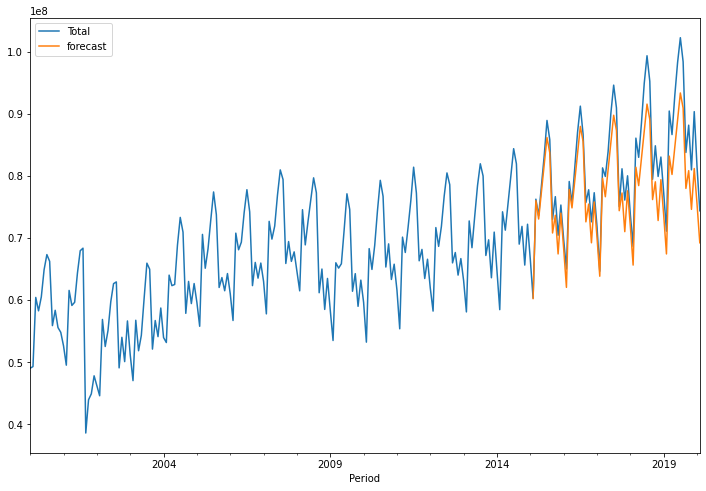

In [57]:
df1['forecast']=results.predict(start=181,end=242,dynamic=True)
df1[['Total','forecast']].plot(figsize=(12,8))

In [72]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [73]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)
future_df=pd.concat([df1,future_datest_df])

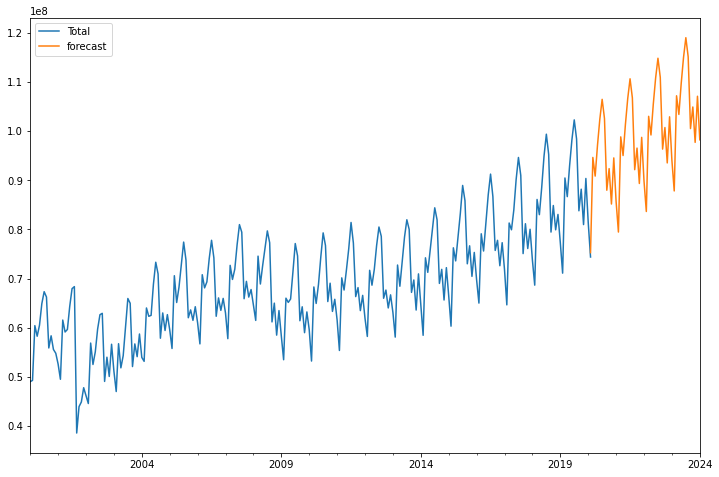

In [74]:
future_df['forecast'] = results.predict(start = 241, end = 290, dynamic= True)  
future_df[['Total', 'forecast']].plot(figsize=(12, 8)) 

In [76]:
model=sm.tsa.statespace.SARIMAX(df,order=(0,1,0),seasonal_order=(0,1,0,12))
model_fit=model.fit()
pred_y=model_fit.predict(start=181,end=241,dynamic=True)
error=np.sqrt(mean_squared_error(df[181:242],pred_y))
print('SARIMA%s RMSE=%.2f'%((0,1,0),error))

SARIMA(0, 1, 0) RMSE=4573480.73
